In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [3]:
def get_volt():
    """ 전압 측정"""
    v = np.random.normal(0,2)
    volt_true = 14.4
    volt_measure = volt_true + v
    return volt_measure

In [4]:
def kalman_filter(z_meas, x_esti, P):
    """ 일변량 칼만 필터 """
    # (1) 예측
    x_pred = A * x_esti
    P_pred = A * P * A + Q
    
    # (2) 칼만 이득
    K = P_pred * H / (H * P_pred * H + R)
    
    # (3) 추정
    x_esti = x_pred + K * (z_meas - H * x_pred)
    
    # (4) 오차 공분산
    P = P_pred - K * H * P_pred
    
    return x_esti, P

In [5]:
# Input Parameters.
time_end = 10
dt = 0.2

In [9]:
# 시스템 모델 초기화
A = 1
H = 1
Q = 0
R = 4

# 추정 하기 위한 초기화
x_0 = 12
P_0 = 6

In [10]:
time = np.arange(0,time_end, dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

In [11]:
x_esti, P = None,None

for i in range(n_samples):
    z_meas = get_volt()
    if i==0:
        x_esti , P = x_0,P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)
        
    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti    

Text(0, 0.5, 'Voltage [V]')

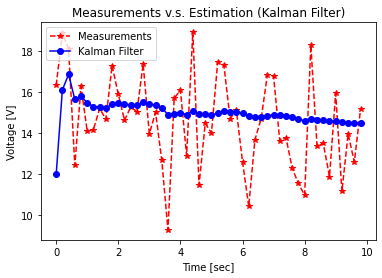

In [12]:
plt.plot(time, volt_meas_save, 'r*--', label='Measurements')
plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('Measurements v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')
plt.savefig('jpg/simple_kalman_filter.jpg')